Text(0.5, 1.0, 'Magnetic Flux')

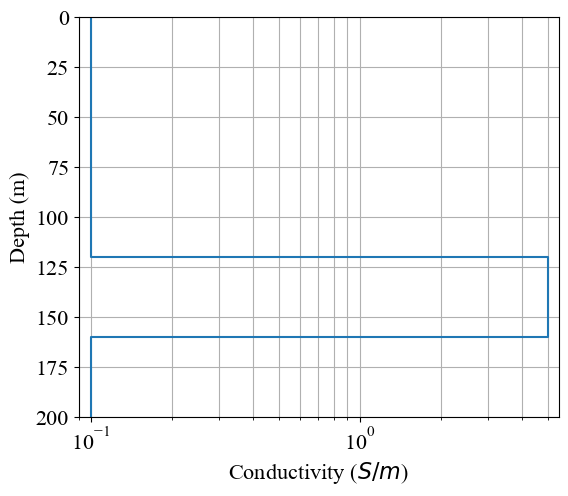

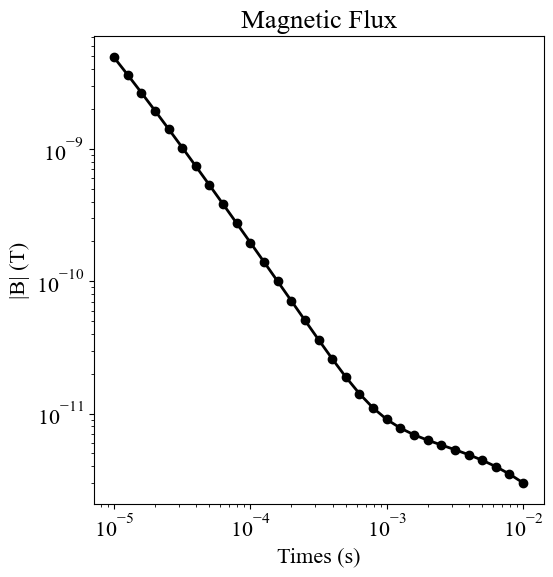

In [61]:
import numpy as np
import os
from matplotlib import pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model
write_output = False
plt.rcParams.update({"font.size": 16})
source_location = np.array([0.0, 0.0, 1])
source_orientation = "z" 
source_current = 2.0  
source_radius = 10.0 
receiver_location = np.array([0.0, 0.0, 1])
receiver_orientation = "z" 
times = np.logspace(-5, -2, 31)  
receiver_list = []
receiver_list.append(
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
)
waveform = tdem.sources.StepOffWaveform()
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]
survey = tdem.Survey(source_list)
background_conductivity = 0.1
layer_conductivity = 5
thicknesses = np.array([40.0, 40.0, 40, 40])
n_layer = len(thicknesses) + 1
model = background_conductivity * np.ones(n_layer)
model[3] = layer_conductivity
model_mapping = maps.IdentityMap(nP=n_layer)
thicknesses_for_plotting = np.r_[thicknesses, 40.0]
fig = plt.figure(figsize=(6, 5))
plt.rcParams.update({
    "font.size": 16,
    "font.family": "Times New Roman"
})
ax = fig.add_axes([0.15, 0.15, 0.8, 0.8])
plot_1d_layer_model(thicknesses_for_plotting, model, ax=ax,scale="log", show_layers=False)
ax.grid(which="both")
ax.set_xlabel(r"Conductivity ($S/m$)")
plt.gca()
simulation = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping,
)
dpred = simulation.dpred(model)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.2, 0.15, 0.75, 0.78])
ax.loglog(times, dpred, "k-o", lw=2)
ax.set_xlabel("Times (s)")
ax.set_ylabel("|B| (T)")
ax.set_title("Magnetic Flux")

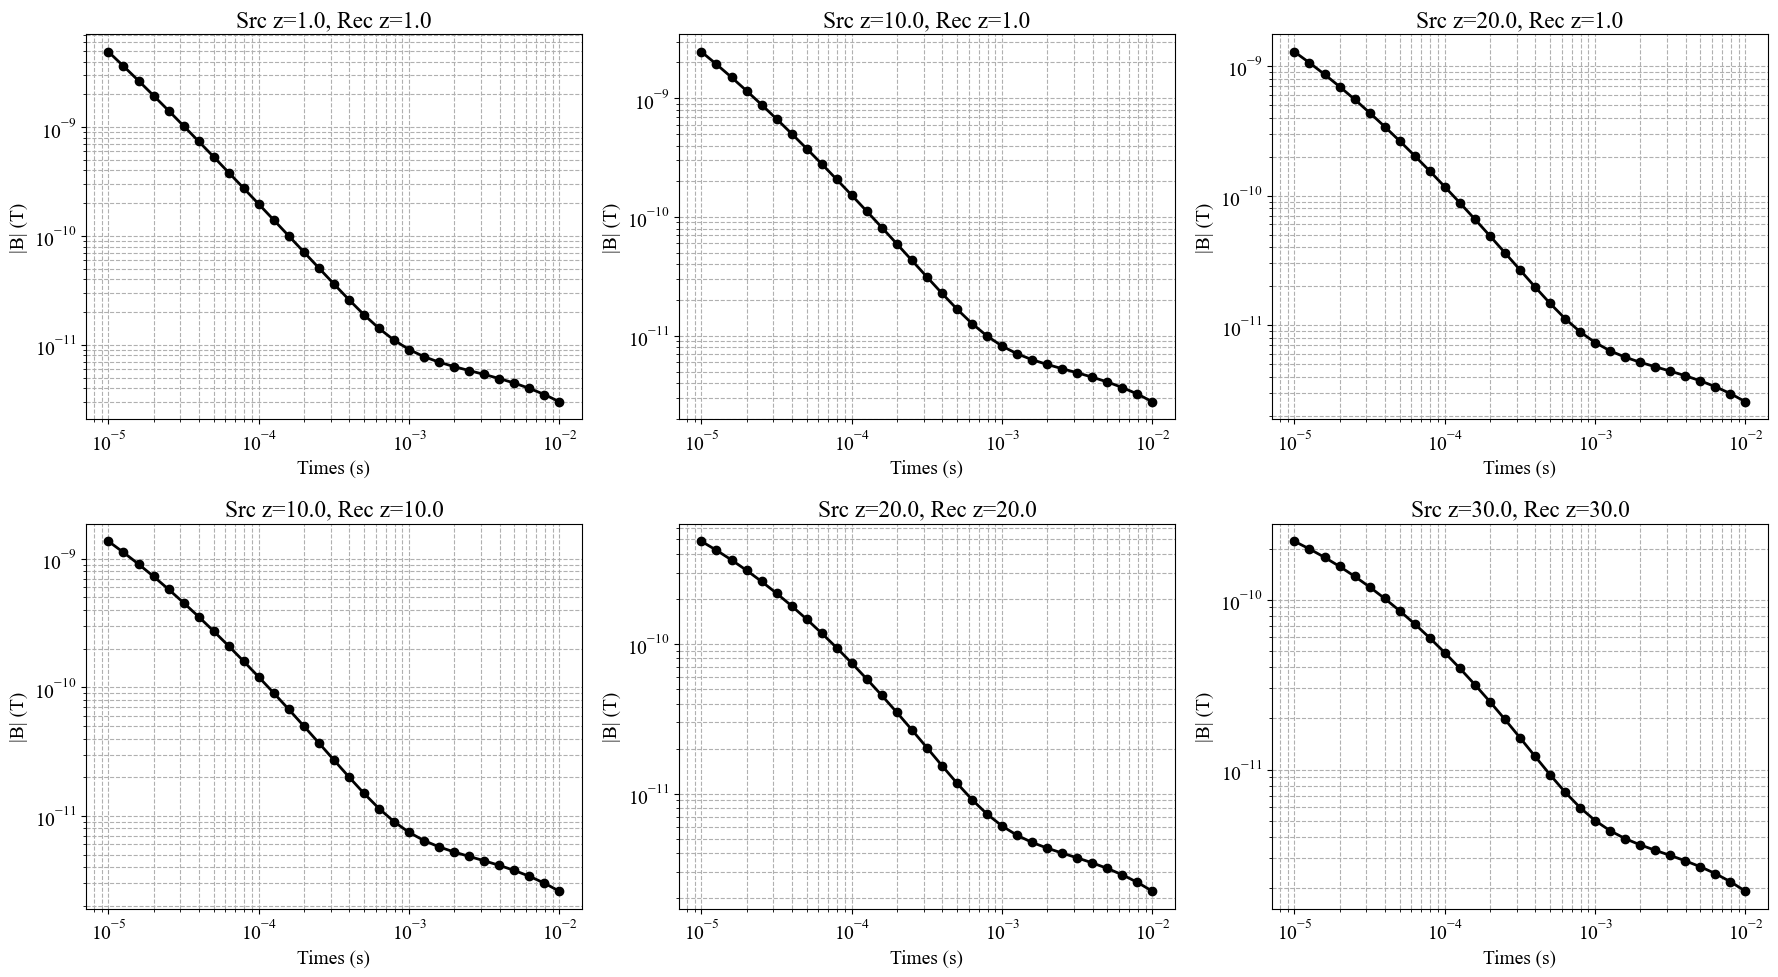

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem

plt.rcParams.update({"font.size": 14, "font.family": "Times New Roman"})
background_conductivity = 0.1
layer_conductivity = 5
thicknesses = np.array([40.0, 40.0, 40.0, 40.0])
n_layer = len(thicknesses) + 1
model = background_conductivity * np.ones(n_layer)
model[3] = layer_conductivity
model_mapping = maps.IdentityMap(nP=n_layer)
times = np.logspace(-5, -2, 31)
source_current = 2.0
source_radius = 10.0
scenarios = [
    {"source_z": 1.0, "receiver_z": 1.0},
    {"source_z": 10.0, "receiver_z": 1.0},
    {"source_z": 20.0, "receiver_z": 1.0},
    {"source_z": 10.0, "receiver_z": 10.0},
    {"source_z": 20.0, "receiver_z": 20.0},
    {"source_z": 30.0, "receiver_z": 30.0},
]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, scenario in enumerate(scenarios):
    receiver_loc = np.array([0.0, 0.0, scenario["receiver_z"]])
    receiver_list = [tdem.receivers.PointMagneticFluxDensity(receiver_loc, times, orientation="z")]

    waveform = tdem.sources.StepOffWaveform()

    source_loc = np.array([0.0, 0.0, scenario["source_z"]])
    source_list = [tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_loc,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )]
    survey = tdem.Survey(source_list)

    simulation = tdem.Simulation1DLayered(
        survey=survey,
        thicknesses=thicknesses,
        sigmaMap=model_mapping,
    )
    dpred = simulation.dpred(model)

    ax = axes[i]
    ax.loglog(times, dpred, "k-o", lw=2)
    ax.set_xlabel("Times (s)")
    ax.set_ylabel("|B| (T)")
    ax.set_title(f"Src z={scenario['source_z']}, Rec z={scenario['receiver_z']}")
    ax.grid(True, which="both", linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()


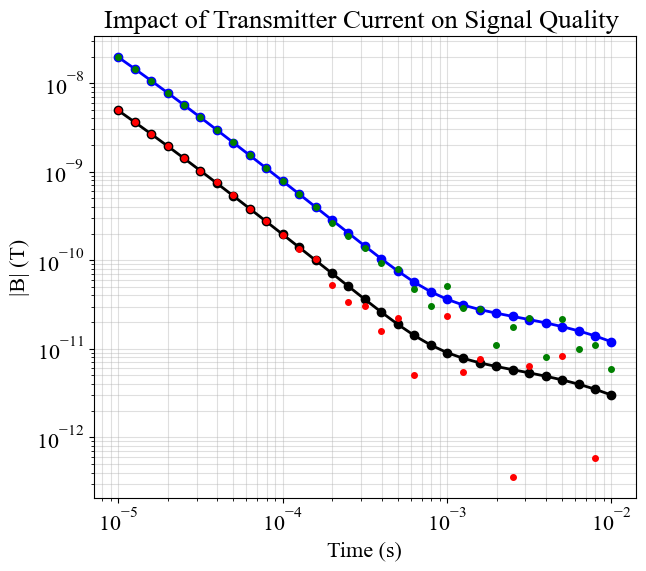

In [66]:
import numpy as np
import os
from matplotlib import pyplot as plt
from SimPEG import maps
import SimPEG.electromagnetics.time_domain as tdem
from SimPEG.utils import plot_1d_layer_model

plt.rcParams.update({
    "font.size": 16,
    "font.family": "Times New Roman"
})
source_location = np.array([0.0, 0.0, 1])
source_orientation = "z"
source_current = 2.0      
source_radius = 10.0
receiver_location = np.array([0.0, 0.0, 1])
receiver_orientation = "z"
times = np.logspace(-5, -2, 31)  
receiver_list = [
    tdem.receivers.PointMagneticFluxDensity(
        receiver_location, times, orientation=receiver_orientation
    )
]

waveform = tdem.sources.StepOffWaveform()
source_list = [
    tdem.sources.CircularLoop(
        receiver_list=receiver_list,
        location=source_location,
        waveform=waveform,
        current=source_current,
        radius=source_radius,
    )
]
survey = tdem.Survey(source_list)
background_conductivity = 0.1
layer_conductivity = 5
thicknesses = np.array([40.0, 40.0, 40, 40])
n_layer = len(thicknesses) + 1
model = background_conductivity * np.ones(n_layer)
model[3] = layer_conductivity
model_mapping = maps.IdentityMap(nP=n_layer)
thicknesses_for_plotting = np.r_[thicknesses, 40.0]
simulation = tdem.Simulation1DLayered(
    survey=survey,
    thicknesses=thicknesses,
    sigmaMap=model_mapping,
)
dpred_true = simulation.dpred(model)
np.random.seed(42)  
noise_level = 1e-11  
noise = noise_level * np.random.randn(len(dpred_true))
dpred_noisy = dpred_true + noise
scale_factor = 4.0 
dpred_scaled = scale_factor * dpred_true
dpred_scaled_noisy = dpred_scaled + noise  
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.loglog(times, dpred_true, "k-o", lw=2, label="True Response (2 A)")
ax.loglog(times, dpred_noisy, "r.", ms=8, label="Noisy (2 A)")
ax.loglog(times, dpred_scaled, "b-o", lw=2, label=f"True Response ({scale_factor*source_current:.0f} A)")
ax.loglog(times, dpred_scaled_noisy, "g.", ms=8, label=f"Noisy ({scale_factor*source_current:.0f} A)")
ax.set_xlabel("Time (s)")
ax.set_ylabel("|B| (T)")
ax.set_title("Impact of Transmitter Current on Signal Quality ")
ax.grid(which="both", alpha=0.4)
plt.show()
